In [1]:
"""
absolute alignment
1. culster 30 
2. use jaccard similarity  measure each sample

"""

'\nabsolute alignment\nculster 30 \n'

In [2]:
####### dropout resnet18 vs without dropout
#### 
import torch
import sys
sys.path.append("..")
import numpy as np

CLEAN_PATH = "/home/yifan/dataset/resnet18_with_dropout/pairflip/cifar10/0/"
REF_PATH = "/home/yifan/dataset/clean/pairflip/cifar10/0"


ENCODER_DIMS=[512,256,256,256,256,2]
DECODER_DIMS= [2,256,256,256,256,512]
VIS_MODEL_NAME = 'vis'

DEVICE='cuda:1'
########## initulize reference data and target data
from AlignVis.DataInit import DataInit
REF_EPOCH = 200
TAR_EPOCH = 200
ref_datainit = DataInit(REF_PATH,REF_PATH,REF_EPOCH,DEVICE)
tar_datainit = DataInit(CLEAN_PATH,CLEAN_PATH,TAR_EPOCH,DEVICE)
ref_model, ref_provider, ref_train_data, ref_prediction, ref_prediction_res, ref_scores = ref_datainit.getData()
tar_model, tar_provider, tar_train_data, tar_prediction, tar_prediction_res, tar_scores = tar_datainit.getData()


from AlignVis.ReferenceGenerator import ReferenceGenerator
gen = ReferenceGenerator(ref_provider=ref_provider, tar_provider=tar_provider,REF_EPOCH=REF_EPOCH,TAR_EPOCH=TAR_EPOCH,ref_model=ref_model,tar_model=tar_model,DEVICE=DEVICE)

absolute_alignment_indicates,predict_label_diff_indicates,predict_confidence_Diff_indicates,high_distance_indicates = gen.subsetClassify(18,0.8,0.3,0.05)


from AlignVisAutoEncoder.trans_visualizer_border import visualizer
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

I = np.eye(512)
projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")
vis = visualizer(ref_provider, I,I, np.dot(ref_provider.train_representation(TAR_EPOCH),I), projector, 200,[0,1],'tab10')


/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NET resnet18
Finish initialization...


RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

In [87]:
from AlignVis.AlignSimilarityScaler import AlignSimilarityScaler
Align_SimilarityScaler = AlignSimilarityScaler(REF_PATH, REF_PATH, CLEAN_PATH, CLEAN_PATH, 200,200, DEVICE)

NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 8672.94it/s]

NET resnet18_with_dropout


Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 7115.94it/s]


In [88]:
sim_list = Align_SimilarityScaler.get_jaccard_similarities()

ref_cluster 18 5 tar_cluster_labels 3022 2989
ref_cluster 8 17 tar_cluster_labels 2123 2125
ref_cluster 16 17 tar_cluster_labels 2876 2125
ref_cluster 10 18 tar_cluster_labels 3267 1960
ref_cluster 4 6 tar_cluster_labels 2144 1084
ref_cluster 14 11 tar_cluster_labels 2858 2061
ref_cluster 2 12 tar_cluster_labels 2033 1890
ref_cluster 11 9 tar_cluster_labels 2189 2081
ref_cluster 6 2 tar_cluster_labels 4956 2761
ref_cluster 1 16 tar_cluster_labels 3204 1855
ref_cluster 17 18 tar_cluster_labels 1738 1960
ref_cluster 5 10 tar_cluster_labels 2813 2920
ref_cluster 11 10 tar_cluster_labels 2189 2920
ref_cluster 2 1 tar_cluster_labels 2033 3110
ref_cluster 16 3 tar_cluster_labels 2876 2874
ref_cluster 8 17 tar_cluster_labels 2123 2125
ref_cluster 16 3 tar_cluster_labels 2876 2874
ref_cluster 1 0 tar_cluster_labels 3204 3159
ref_cluster 12 12 tar_cluster_labels 1502 1890
ref_cluster 19 19 tar_cluster_labels 1981 2010
ref_cluster 10 8 tar_cluster_labels 3267 3041
ref_cluster 1 0 tar_cluster_lab

In [102]:
jaccard_similarities = sim_list

In [105]:
indices = [i for i, score in enumerate(jaccard_similarities) if score >0.7]
len(indices)

8533

In [108]:
diff_indices = [i for i, score in enumerate(jaccard_similarities) if score <0.2]

In [80]:
len(diff_indices)

9540

Computing decision regions ...


100%|██████████| 48/48 [00:00<00:00, 13126.00it/s]


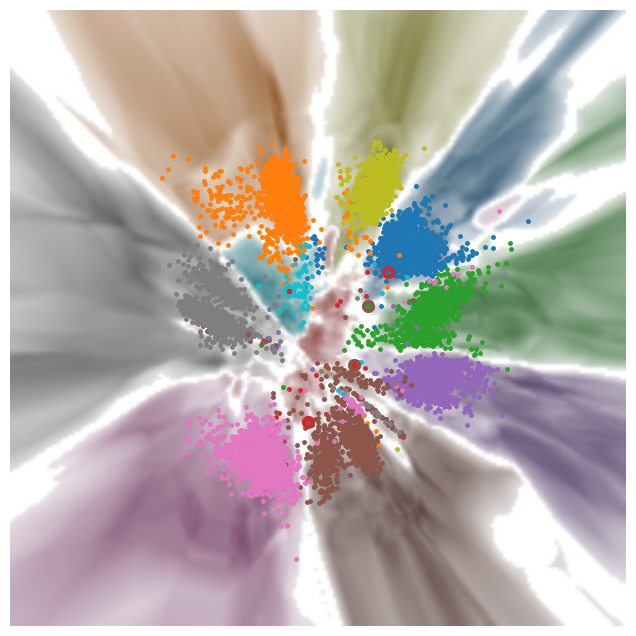

In [85]:


import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)
VIS_MODEL_NAME = 'vis'
projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")

I = np.eye(512)
from AlignVis_Baseline.visualizer import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(ref_provider , projector, 200,[diff_indices],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(REF_EPOCH, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img2.png"))

Computing decision regions ...


100%|██████████| 203/203 [00:00<00:00, 8846.17it/s]


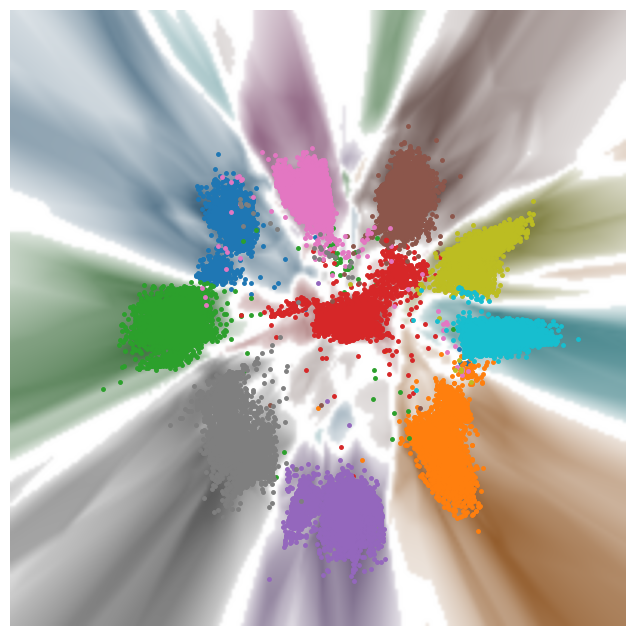

In [86]:


import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)
VIS_MODEL_NAME = 'vis'
projector = TimeVisProjector(vis_model=model, content_path=CLEAN_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")

I = np.eye(512)
from AlignVis_Baseline.visualizer import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(tar_provider , projector, 200,[indices],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(REF_EPOCH, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img2.png"))

In [1]:
####### evaluateion
from AlignVisAutoEncoder.autoencoder import SimpleAutoencoder

input_dim = 512
output_dim = 512

autoencoder = SimpleAutoencoder(input_dim,output_dim)
checkpoint = torch.load("/home/yifan/projects/deepdebugertool/DLVisDebugger/AlignVisAutoEncoder/checkpoints/loss_contrastive.pth")
autoencoder.load_state_dict(checkpoint['model_state_dict'])
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)
VIS_MODEL_NAME = 'vis'
projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")
Y = torch.Tensor(tar_provider.train_representation(TAR_EPOCH))
encoded_Y = autoencoder.encoder(Y)
I = np.eye(512)
from AlignVisAutoEncoder.visualizer import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(tar_provider, ref_provider, autoencoder, np.dot(encoded_Y.detach().numpy(), I), projector, 200,[],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(REF_EPOCH, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img2.png"))

ModuleNotFoundError: No module named 'AlignVisAutoEncoder'

In [92]:
ref_2d = projector.batch_project(200,ref_provider.train_representation(200))

In [93]:
tar_2d = projector.batch_project(200, encoded_Y.detach().numpy())

In [98]:
from sklearn.metrics import pairwise_distances

# Assuming X1 and X2 are your two datasets with shape (n1, d) and (n2, d) respectively
# Compute the pairwise distances between samples in X1 and X2
distances = pairwise_distances(ref_2d, tar_2d)

# Compute the average distance for each sample in X1
# avg_distances = distances.mean(axis=1)

In [100]:
avg_distances = distances.mean()

In [101]:
avg_distances

7.161206

In [106]:
distances_1 = pairwise_distances(ref_2d[indices], tar_2d[indices])

In [107]:
distances_1.mean()

4.7240624

In [109]:
distances_2 = pairwise_distances(ref_2d[diff_indices], tar_2d[diff_indices])

In [110]:
distances_2.mean()

6.8087726